<a href="https://colab.research.google.com/github/rajeshwari179/Stereosquad/blob/main/corner_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

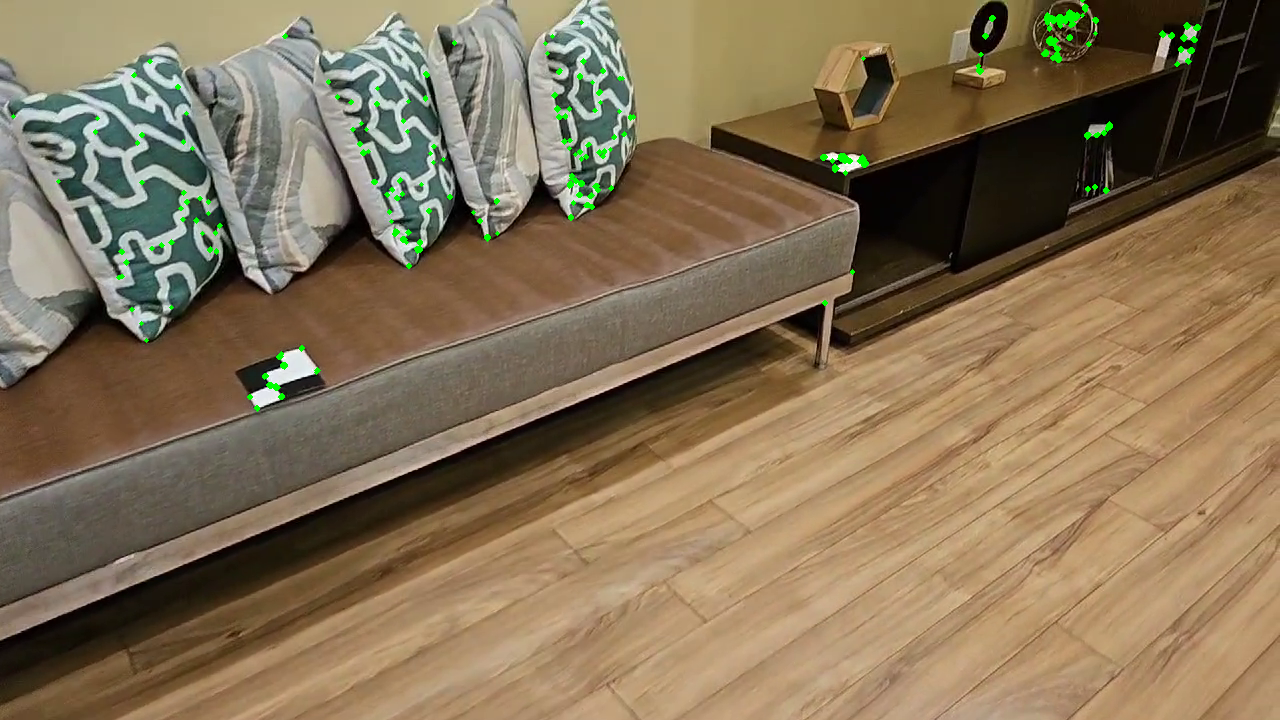

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def harris_corner_detection(image, threshold=0.1):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute gradients using Sobel operator
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Compute products of gradients
    Ixx = sobelx * sobelx
    Ixy = sobelx * sobely
    Iyy = sobely * sobely

    # Compute the sums of products of gradients using a Gaussian window
    kernel_size = 5
    Mxx = cv2.GaussianBlur(Ixx, (kernel_size, kernel_size), 0)
    Mxy = cv2.GaussianBlur(Ixy, (kernel_size, kernel_size), 0)
    Myy = cv2.GaussianBlur(Iyy, (kernel_size, kernel_size), 0)

    # Compute Harris corner response
    k = 0.04  # Empirical constant
    det = Mxx * Myy - Mxy * Mxy
    trace = Mxx + Myy
    R = det - k * trace * trace

    # Threshold the response to find corners
    response_thresh = threshold * R.max()
    corners = np.where(R > response_thresh)

    # Return the coordinates of detected corners
    return corners

# Load the image
image = cv2.imread('/content/output_frames/frame_0691.png')

# Detect corners using Harris corner detection
corners = harris_corner_detection(image)

# Plot the image
for x, y in zip(corners[1], corners[0]):
    cv2.circle(image, (x, y), 2, (0, 255, 0), -1)  # Draw a filled circle (point)

# Display the result
cv2_imshow(image)


In [4]:
import cv2
import os

# Function to extract frames from video
def extract_frames(video_path, output_dir):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Initialize frame count
    frame_count = 0

    # Read until the end of the video
    while cap.isOpened():
        # Capture frame-by-frame
        ret, frame = cap.read()

        if ret:
            # Save the frame as an image file
            output_path = os.path.join(output_dir, f'frame_{frame_count:04d}.png')
            cv2.imwrite(output_path, frame)

            # Increment frame count
            frame_count += 1
        else:
            break

    # Release the video capture object
    cap.release()

# Path to the input video file
input_video_path = '/content/TEST.mp4'

# Directory to save the extracted frames
output_directory = 'output_frames'

# Call the function to extract frames
extract_frames(input_video_path, output_directory)

print('Frames extracted successfully.')


Frames extracted successfully.
